# 광우참 분류기

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.4.1'

In [2]:
import pathlib

data_dir = pathlib.Path('./datasets/fishes/')
data_dir

WindowsPath('datasets/fishes')

In [3]:
len(list(data_dir.glob('*/*.jpg')))

87

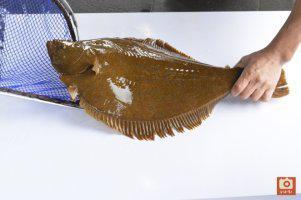

In [4]:
flatfish = list(data_dir.glob('flatfish/*'))
PIL.Image.open(str(flatfish[0]))

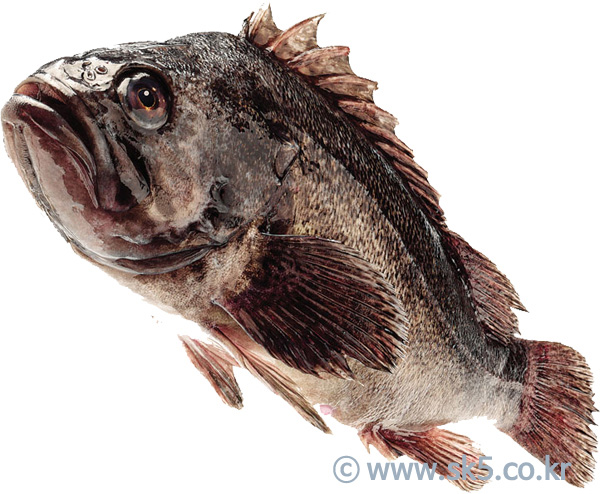

In [5]:
rockfish = list(data_dir.glob('rockfish/*'))
PIL.Image.open(str(rockfish[0]))

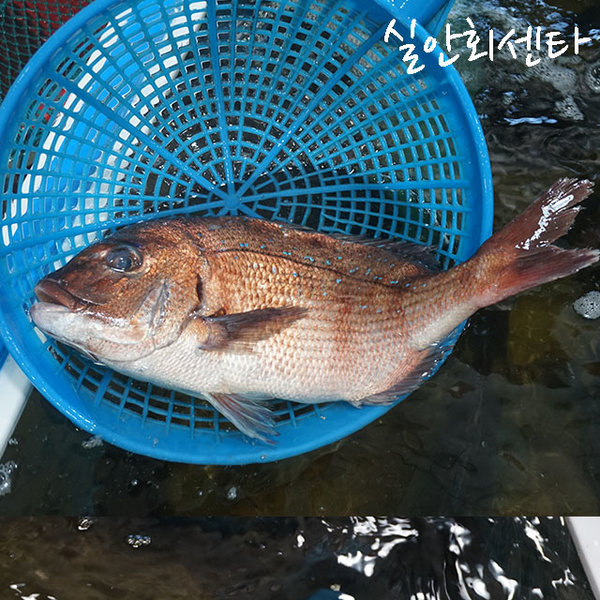

In [6]:
snapper = list(data_dir.glob('snapper/*'))
PIL.Image.open(str(snapper[0]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 90 files belonging to 3 classes.
Using 72 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 90 files belonging to 3 classes.
Using 18 files for validation.


In [10]:
train_labels = train_ds.class_names
val_labels = val_ds.class_names

In [11]:
image, label = next(iter(train_ds))
# _ = plt.imshow(image)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = len(train_labels)

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [15]:
model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
3/3 [==============================] - 2s 442ms/step - loss: 1.2319 - accuracy: 0.3003 - val_loss: 1.3632 - val_accuracy: 0.1667
Epoch 2/20
3/3 [==============================] - 1s 266ms/step - loss: 1.1326 - accuracy: 0.3546 - val_loss: 1.0975 - val_accuracy: 0.1667
Epoch 3/20
3/3 [==============================] - 1s 247ms/step - loss: 0.9679 - accuracy: 0.5595 - val_loss: 0.9380 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 243ms/step - loss: 0.8299 - accuracy: 0.7530 - val_loss: 0.9674 - val_accuracy: 0.3889
Epoch 5/20
3/3 [==============================] - 1s 243ms/step - loss: 0.6596 - accuracy: 0.7808 - val_loss: 0.6793 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 1s 243ms/step - loss: 0.4446 - accuracy: 0.8898 - val_loss: 0.6448 - val_accuracy: 0.7222
Epoch 7/20
3/3 [==============================] - 1s 248ms/step - loss: 0.4066 - accuracy: 0.8338 - val_loss: 0.5801 - val_accuracy: 0.7778
Epoch 8/20
3/3 [====